## **[4 Things to Do When Applying Cross-Validation with Time Series](https://towardsdatascience.com/4-things-to-do-when-applying-cross-validation-with-time-series-c6a5674ebf3a)**
### **A few practical recommendations for getting better forecasting performance estimates**

This article is about evaluating forecasting models using cross-validation. You’ll learn a few good practices for applying cross-validation with time series.

### **Primer on Cross-Validation**
You shouldn’t use the same data to train and test a model.

Why is that?

A model learns as many patterns as it can. Some patterns capture the true relationship between past and future observations. But, the model also learns the inherent noise in the training set. Fluke patterns that do not generalize well in future observations.

Thus, training and testing a model on the same data leads to optimistic results. We’ve known this since 1931(!!) [1].

<center> <p>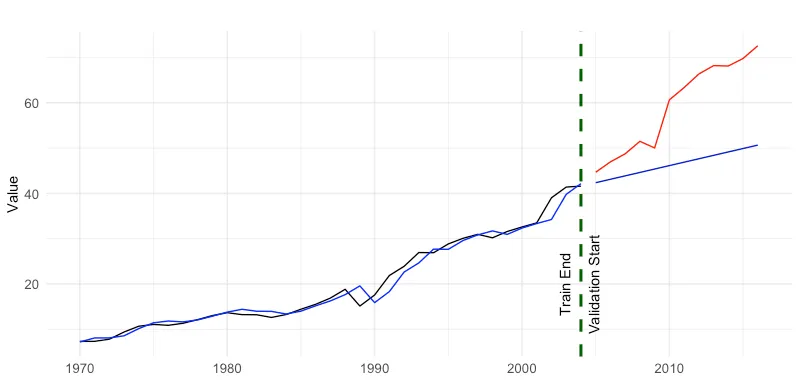</p> </center>

Cross-validation was developed to solve this problem.

Cross-validation is the process of splitting the data many times. At each split, part of the data is used for training a model (the training set). The remaining part (validation set) is used to assess the performance of that model.

The idea behind cross-validation is to replicate a realistic scenario. The training data serves as the data available to create a model. The validation set acts as the data you’d encounter after deploying that model.

Ultimately, the goal of cross-validation is to provide a reliable estimate of performance. To assess how well a model will perform after being deployed.

### **Cross-Validation for Time Series**
#### **K-fold cross-validation**
There are many ways to do cross-validation with a data set. K-fold cross-validation is one of the most popular approaches. It works by randomly splitting the data into K folds. Each fold contains the same number of observations. Then, each fold is iteratively used for validation. Finally, you average the performance of a model across all folds to estimate its performance. If you test several models, you select the one with the best average performance.

The image below illustrates the splitting criteria of 5-fold cross-validation.

<center> <p>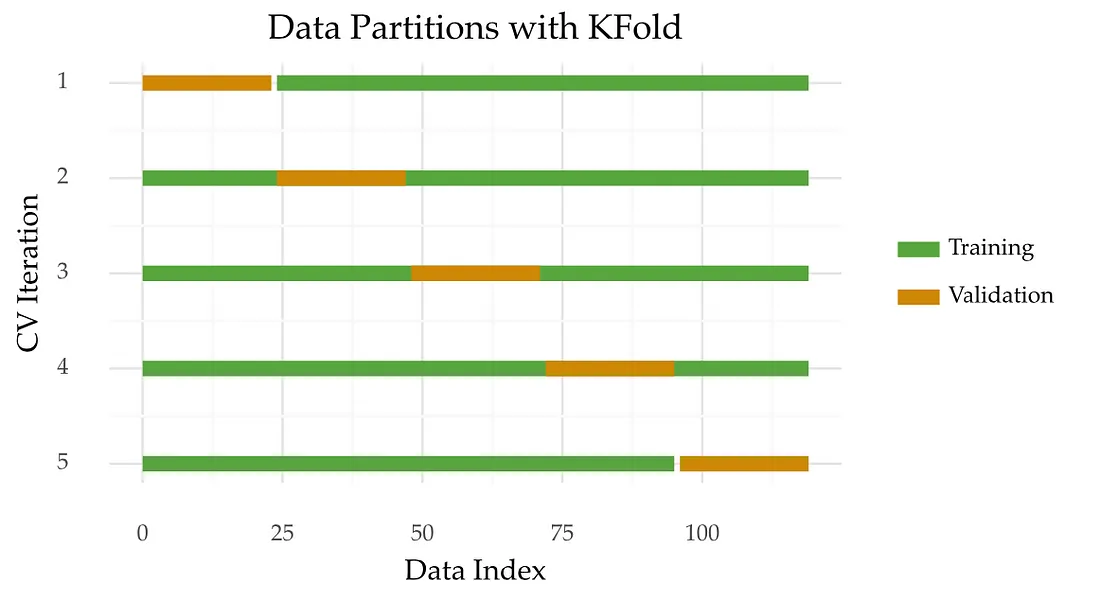</p> </center>

K-fold cross-validation can be extended in different ways.

- You can repeat the process many times to get more reliable results. This is known as repeated K-fold cross-validation;
- The stratified K-fold cross-validation makes sure each fold preserves the original class distribution;
- You can use the group K-fold cross-validation to split distinct groups across different folds.

K-fold cross-validation is appealing for two main reasons. One is its simple splitting heuristic. The other is its data efficiency. All available observations are used for both training and testing at some point.

#### **Why K-fold cross-validation is no good for time series**
Cross-validation works under the assumption that the observations are independent. But, this is not true for time series.

Time series are ordered sequences. Each observation depends somewhat on what happened before. This dependency is quantified by statistics such as auto-correlation.

### **Practical Recommendations**
So, how should we evaluate forecasting models?

The rest of this story provides four practical suggestions to do this.

#### **1. Preserve the Temporal Order**
Keeping the order of observations is key for obtaining reliable estimates. Arguably, it’s the golden rule for applying cross-validation with time series.

What happens if you shuffle observations? The model learns nuances from the future that have not revealed themselves in the past. This leads to optimistic estimates.

#### **2. Create a Gap Between Training and Validation**
The training and validation sets are usually contiguous (see Figure 2). Thus, the initial part of the validation set is highly correlated with the last part of the training set.

As such, it’s a good idea to remove the training observations close to the validation set. This increases the independence between training and validation. This process is also known as purging.

<center> <p>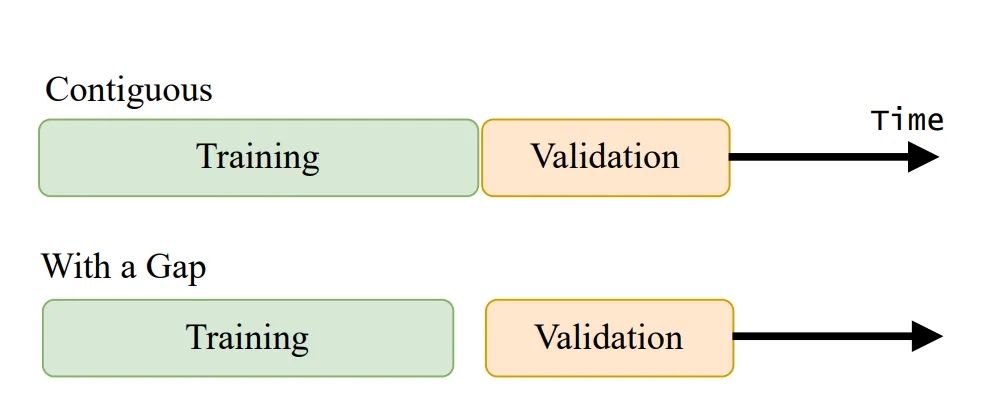</p> </center>

#### **3. Create Several Splits**
Doing many splits is a generally good practice for all types of data, including time series.

A single split may be biased due to the particularities of the selected origin. Many splits will cover different parts of the time series. For example, different trend or seasonality patterns.

Yet, doing many splits is less important if your time series is large (say, thousands of observations).

### **TimeSeriesSplits**
So, which method follows these guidelines?

An example is TimeSeriesSplits, a method available in `scikit-learn`. This approach is known by different names. These include time series cross-validation, walk-forward validation, or prequential in blocks.

The idea is to split the time series into K contiguous blocks. Then, each block is used to first test a model and then to re-train it.

Here’s a graphic to help you visualize this process.



<center> <p>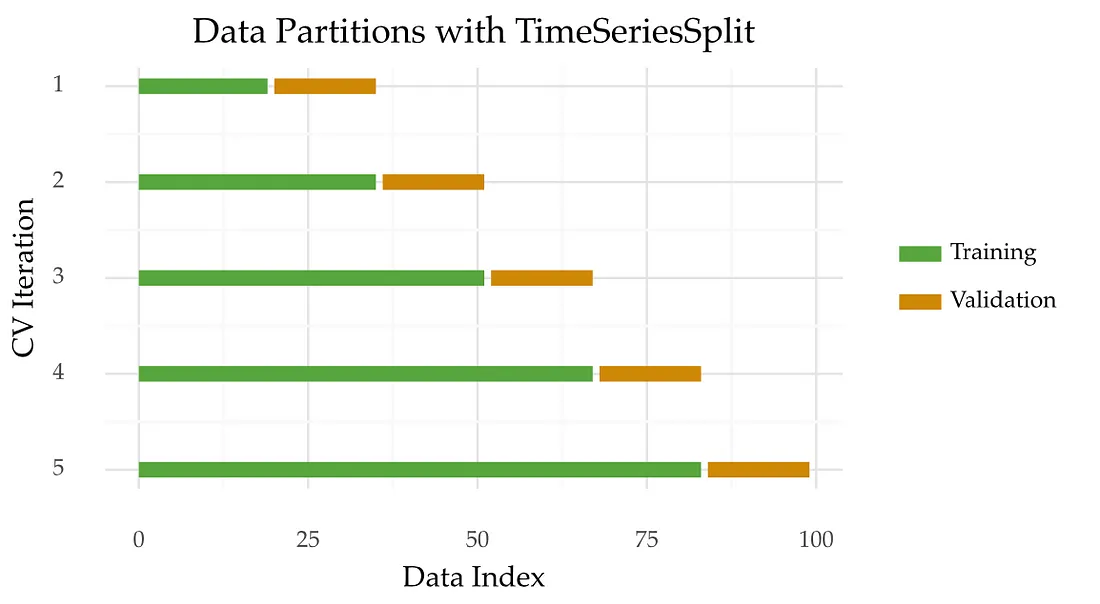</p> </center>

Now with a gap between training and validation sets:

<center> <p>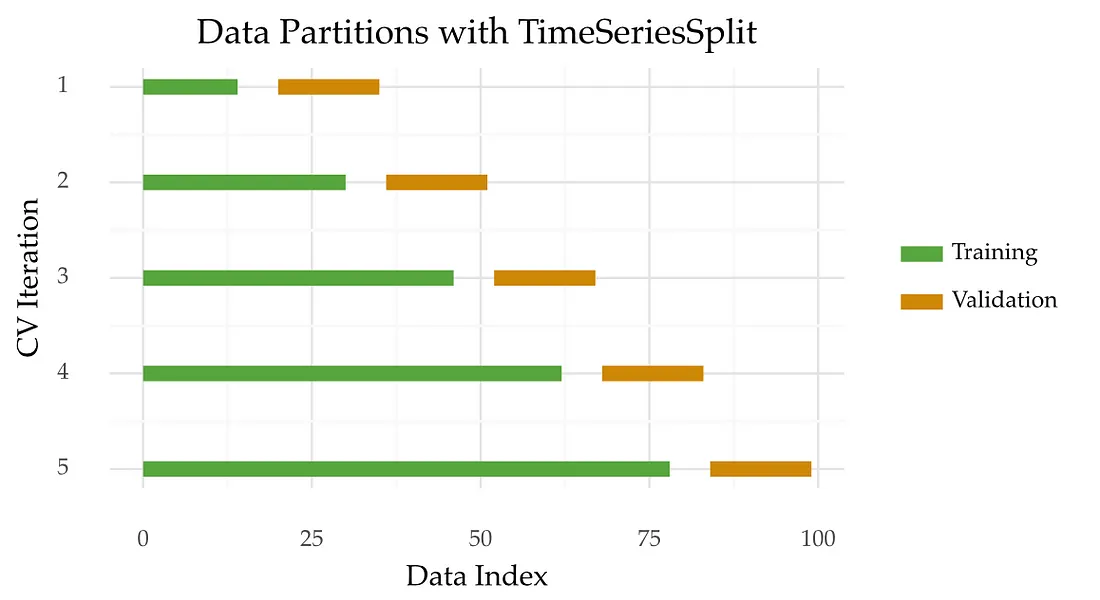</p> </center>

TimeSeriesSplits implementation is compatible with other scikit-learn functions, e.g. GridSearchCV. Here’s an example of the optimization of a Random Forest:

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100)

model = RandomForestRegressor()
param_search = {'n_estimators' : [10, 100]}

cv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=cv, param_grid=param_search)
gsearch.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 100]})

### **Multiple Time Series or Groups**

#### **4. Keep Each Time Series in Different Folds**
Sometimes you have to work with many time series, not just one. For example, the daily sales of different retail products. Each product represents a time series.

More often than not, the time series in your data set are correlated with each other to some degree. So, you may want to keep each series in a specific fold to prevent information leakage. This results in greater independence between training and validation sets.

The [GroupTimeSeriesSplit](http://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/) method can be used in these cases.

### **Take-Aways**
In this article, you learned four aspects to consider when applying cross-validation to time series.

1. Preserve the temporal order of observations;
2. Create a gap between training and validation;
3. Create many splits or folds;
4. For data sets with many time series, keep each time series in different folds.

Thanks for reading and see you in the next story!